# Cat Dog Image Classification & Demo with GradioML

Import dependencies

In [1]:
import numpy as np
import pandas as pd 
import random

import matplotlib.pyplot as plt
import os
import cv2

from sklearn.model_selection import train_test_split
from sklearn import metrics

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

import gradio
import gradio as gr

## Explore and organize the data

check out the data in the 'PetImages' folder

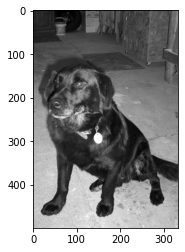

The image shape is (500, 333)


In [82]:
DATADIR = os.path.abspath(os.getcwd()) + '/PetImages'

path = os.path.join(DATADIR, category)    #path to cats or dogs dir
first_img_path = os.listdir(path)[0]
img_array = cv2.imread(os.path.join(path, first_img_path), cv2.IMREAD_GRAYSCALE)
plt.imshow(img_array, cmap = "gray")
plt.show()

#show image shape
print('The image shape is {}'.format(img_array.shape))


Because this exercise will be for a simple CNN model, we will resize all images to shape (100, 100)

an example is shown below

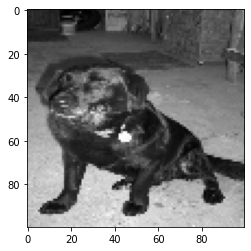

The image shape is (100, 100)


In [83]:
#resize image
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

#show image shape
print('The image shape is {}'.format(new_array.shape))

we will now organize all of the images and their classes

In [8]:
#create create array of data
data = []

def create_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)    #path to cats or dogs dir    
        class_num = CATEGORIES.index(category)    #assign class label
        
        for img in os.listdir(path):
            try: 
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))

                data.append([new_array, class_num])
            except Exception as e:
                pass
create_data()
print('There are {} total images'.format(len(data)))

here we separate the image arrays as X and labels as y

In [11]:
#randomly shuffle the images
random.shuffle(data)

#separate features and labels
X = []
y = []

for features, label in data:
    X.append(features)
    y.append(label)

#neural network takes in a numpy array as the features and labels so convert from list to array and change shape
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

The image shape is (100, 100, 1)


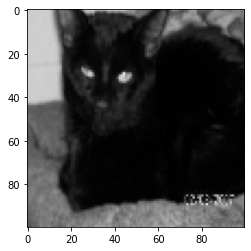

In [86]:
first_feature = X[0]
plt.imshow(first_feature, cmap = 'gray')
print('The image shape is {}'.format(first_feature.shape))

In [12]:
#show shape; (count of images, rows, columns, dimension (1D because grayscale image))
X.shape

(24946, 100, 100, 1)

In [13]:
#normalize images
X = X/255.0

## Modeling

next we perform a train test split (training size as 70%, test size as 30%)

In [14]:
#separate training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('the shape of training features is {}'.format(X_train.shape))
print('the shape of training labels is {}'.format(y_train.shape))

print('the shape of test features is {}'.format(X_test.shape))
print('the shape of test labels is {}'.format(y_test.shape))

the shape of training features is (17462, 100, 100, 1)
the shape of training labels is (17462,)
the shape of test features is (7484, 100, 100, 1)
the shape of test labels is (7484,)


create a convolutional neural network using the following architecture:

In [101]:
#create model
model = Sequential()

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.1))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, input_shape = X.shape[1:], activation = 'relu'))

#output layer
model.add(Dense(2, activation = 'softmax'))

compile the model with the following parameters:

In [102]:
#compile the model
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

train the model with 5 epochs and validation split of 0.1

In [103]:
#fit model
history = model.fit(X_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
492/492 [==============================] - 152s 306ms/step - loss: 0.6958 - accuracy: 0.5271 - val_loss: 0.6737 - val_accuracy: 0.5804
Epoch 2/5
492/492 [==============================] - 146s 297ms/step - loss: 0.6249 - accuracy: 0.6515 - val_loss: 0.5321 - val_accuracy: 0.7533
Epoch 3/5
492/492 [==============================] - 137s 279ms/step - loss: 0.5184 - accuracy: 0.7410 - val_loss: 0.4743 - val_accuracy: 0.7882
Epoch 4/5
492/492 [==============================] - 141s 286ms/step - loss: 0.4433 - accuracy: 0.7925 - val_loss: 0.4350 - val_accuracy: 0.7899
Epoch 5/5
492/492 [==============================] - 156s 317ms/step - loss: 0.4044 - accuracy: 0.8186 - val_loss: 0.3918 - val_accuracy: 0.8197


In [112]:
hist = history.history

we can use these next two cells to save/load model and history (so that we don't have to train the model every time)

In [113]:
#save model
model.save(os.path.abspath(os.getcwd()))

#save history
np.save('my_history.npy',hist)

INFO:tensorflow:Assets written to: /Users/dbtjdals/Desktop/Practice/cat_dog/cat_dog/assets


In [114]:
#load model
model = keras.models.load_model(os.path.abspath(os.getcwd()))

#load history
hist=np.load('my_history.npy',allow_pickle='TRUE').item()

In [117]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 98, 98, 64)        640       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 49, 49, 64)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 47, 47, 64)        36928     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 21, 21, 64)       

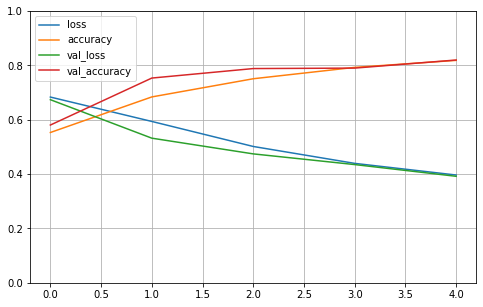

In [104]:
#show learning curves
#mean training loss and accuracy measured over each epoch
#mean validation loss and accuracy measured at the end of each epoch

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # set the vertical range to [0-1]
plt.show()

In [116]:
#use the model to make predictions on test data
y_proba = model.predict(X_test)
y_proba.round(2)

array([[0.4 , 0.6 ],
       [0.02, 0.98],
       [0.75, 0.25],
       ...,
       [0.97, 0.03],
       [0.95, 0.05],
       [0.99, 0.01]], dtype=float32)

In [106]:
#use predict_classes() to find the class with the highest probability
y_pred = model.predict_classes(X_test)
y_pred

/Users/dbtjdals/Desktop/Practice/cat_dog/cat_dog/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([1, 1, 0, ..., 0, 0, 0])

In [107]:
print("Performance Summary of Sequential Neural Network on test data:")

#show classification report
print(metrics.classification_report(y_test, y_pred))

#show confusion matrix
print(metrics.confusion_matrix(y_test, y_pred))

Performance Summary of Sequential Neural Network on test data:
              precision    recall  f1-score   support

           0       0.84      0.81      0.82      3723
           1       0.82      0.84      0.83      3761

    accuracy                           0.83      7484
   macro avg       0.83      0.83      0.83      7484
weighted avg       0.83      0.83      0.83      7484

[[3027  696]
 [ 598 3163]]


In [108]:
#separate correct and incorrect predictions
incorrect_indices = []
correct_indices = []

for idx,(i,j) in enumerate(zip(y_pred, y_test)):
    if i != j:
        incorrect_indices.append(idx)
    else:
        correct_indices.append(idx)
        
print(len(correct_indices))
print(len(incorrect_indices))

6190
1294


### Check out both correct and incorrect classification outputs

show first 5 correctly identified test images with predicted labels and probabilities

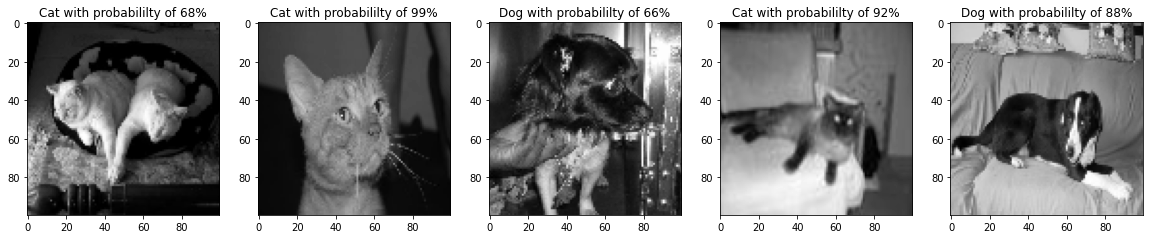

In [109]:
#show first 5 correctly identified test images with predicted labels and probabilities
fig, ax = plt.subplots(1,5,figsize=(20,20))

class_names = ["Dog", "Cat"]

for i, correct_idx in enumerate(correct_indices[:5]):
    ax[i].imshow(X_test[correct_idx].reshape(100,100),cmap='gray')
    ax[i].set_title("{} with probabililty of {}%".format(class_names[y_pred[correct_idx]], int(max(y_proba[correct_idx])*100)))

show first 5 incorrectly identified test images with predicted labels and probabilities

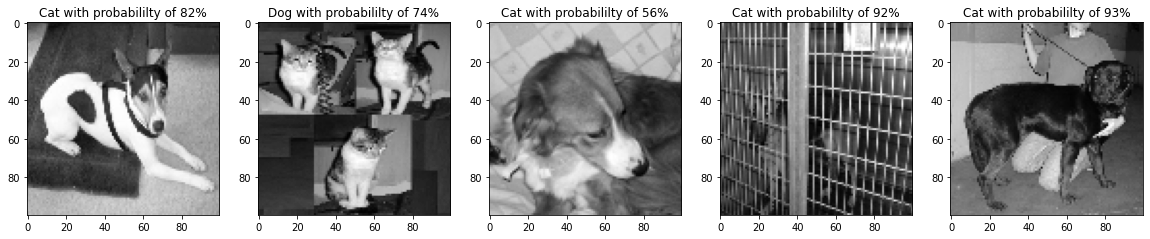

In [110]:
#show first 5 incorrectly identified test images with predicted labels and probabilities
fig, ax = plt.subplots(1,5,figsize=(20,20))

for i, incorrect_idx in enumerate(incorrect_indices[:5]):
    ax[i].imshow(X_test[incorrect_idx].reshape(100,100),cmap='gray')
    ax[i].set_title("{} with probabililty of {}%".format(class_names[y_pred[incorrect_idx]], int(max(y_proba[incorrect_idx])*100)))

## Create a model demo using Gradio

The following is happening in the code below:
* we first create a function called cat_or_dog() which takes an image array as an input, utilizes the model to make predictions, and returns a dictionary with each class name as the key and its respective probability as the value (e.g. {Dog: 0.6, Cat: 0.4}) 
* Set up the input upload: transform the input image to match the input shape which the model takes in, which is (100, 100) in our case. We also set the source to "upload" so that we may upload our own images into Gradio
* Compile the interface; utilize the cat_or_dog() function that we created above, set input as the input uploader,  and allow Gradio to return the class and their probabilities as the output

In [111]:
#create a function to make predictions
#return a dictionary of labels and probabilities
def cat_or_dog(img):
    img = img.reshape(1, 100, 100, 1)
    prediction = model.predict(img).tolist()[0]
    class_names = ["Dog", "Cat"]
    return {class_names[i]: prediction[i] for i in range(2)}

#set the user uploaded image as the input array
#match same shape as the input shape in the model
im = gradio.inputs.Image(shape=(100, 100), image_mode='L', invert_colors=False, source="upload")

#setup the interface
iface = gr.Interface(
    fn = cat_or_dog, 
    inputs = im, 
    outputs = gradio.outputs.Label(),
)
iface.launch(share=True)

Running locally at: http://127.0.0.1:7864/
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://32140.gradio.app
Interface loading below...


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7864/',
 'https://32140.gradio.app')